<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/stock_price_prediction_using_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
files=files.upload()

Saving NSE-TATAGLOBAL11.csv to NSE-TATAGLOBAL11.csv


In [0]:
stock=pd.read_csv("NSE-TATAGLOBAL11.csv")

In [4]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [0]:
X=stock[['Open','High','Low']]
y=stock['Close']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [11]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regressor.coef_)

[-0.55357118  0.83692086  0.71515311]


In [13]:
print(regressor.intercept_)

-0.24037197836000246


In [0]:
predicted=regressor.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
dframe=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [19]:
dframe.head(20)

,Actual,Predicted
458,121.55,121.809683
529,138.85,138.493861
577,124.95,125.063658
416,130.10,128.739726
750,125.00,123.812121
669,125.55,124.618016
1072,153.00,152.882730
705,136.20,136.125884
945,152.95,154.302805
496,150.90,150.908445


In [0]:
import math

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root_Mean_Squared_Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.8487500011236129
Mean Squared Error: 1.3967751860605948
Root_Mean_Squared_Error: 1.1818524383613187


In [0]:
graph=dframe.head(20)

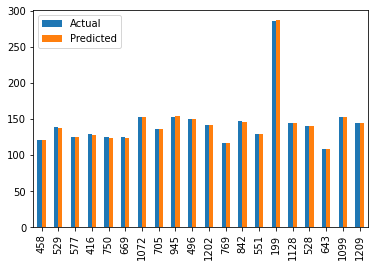

In [24]:
graph.plot(kind='bar')

In [29]:
import statsmodels.api as sm
X_train_sm=X_train
X_train_sm=sm.add_constant(X_train_sm)
model_1=sm.OLS(y_train,X_train_sm).fit()
model_1.params

const   -0.240372
Open    -0.553571
High     0.836921
Low      0.715153
dtype: float64

In [30]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.553e+05
Date:                Wed, 08 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:11:01   Log-Likelihood:                -1465.5
No. Observations:                 864   AIC:                             2939.
Df Residuals:                     860   BIC:                             2958.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2404      0.154     -1.556      0.1